In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
x=df.iloc[:,[1]].values.astype(float)
print(x)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [6]:
y=df.iloc[:,2:3].values.astype(float)
print(y)

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


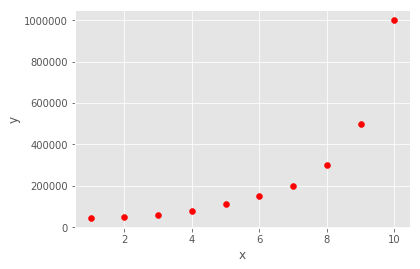

In [7]:
from matplotlib import style
style.use('ggplot')
plt.scatter(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
##x.ndim

In [12]:
y=y.flatten()
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


In [13]:
#y.ndim

In [14]:
lg=LinearRegression()
lg.fit(train_x,train_y)

LinearRegression()

In [15]:
print(lg.coef_)
print(lg.intercept_)

[[0.83457193]]
[0.06023972]


In [18]:
test_x.shape

(3, 1)

In [16]:
y_predict=lg.predict(test_x)
print(y_predict)

[[-0.6661619]
 [ 1.077202 ]
 [-0.0850406]]


In [19]:
r2_score(test_y,y_predict)

0.8588877328994489

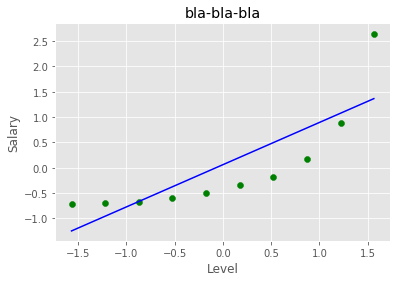

In [32]:
x_grid = np.arange(min(x), max(x), 0.01) #this step required because data is feature scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x,y,color='green')
plt.plot(x_grid,lg.predict(x_grid),color='blue')
plt.title('bla-bla-bla')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Support vector regression

In [20]:
from sklearn.svm import SVR

In [21]:
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


In [22]:
regressor = SVR(kernel='rbf')
regressor.fit(train_x,train_y)

C:\Users\91964\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [25]:
y_pred=regressor.predict(test_x)
print(y_pred)

[-0.56784329  0.62607662 -0.42430308]


In [26]:
r2_score(test_y,y_pred)

0.9445067532077553

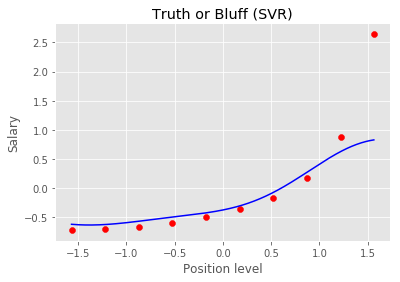

In [31]:
x_grid = np.arange(min(x), max(x), 0.01) #this step required because data is feature scaled.
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()